# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата
Целевой признак
* Exited — факт ухода клиента

## Подготовка данных

### Изучение данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.utils import shuffle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna().mean().sort_values(ascending = False)

Tenure             0.0909
Exited             0.0000
EstimatedSalary    0.0000
IsActiveMember     0.0000
HasCrCard          0.0000
NumOfProducts      0.0000
Balance            0.0000
Age                0.0000
Gender             0.0000
Geography          0.0000
CreditScore        0.0000
Surname            0.0000
CustomerId         0.0000
RowNumber          0.0000
dtype: float64

#### Вывод:

В выводе отражены предложения по дальнейшей работе со столбцами таблицы:

* Следует изменить названия столбцов (привести к snake case)
* Следует изучить подробнее столбец ***tenure*** и обработать пропуски в нем
* Следует удалить ненужные для обучения модели признаки

### Предобработка данных

Преобразуем названия столбцов:

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df = df.rename(str.lower, axis='columns')

In [ ]:
df = df.rename(columns={'rownumber': 'row_number', 'customerid': 'customer_id', 
                           'creditscore': 'credit_score', 'numofproducts': 'num_of_products', 
                           'hascrcard': 'has_cr_card', 'isactivemember': 'is_active_member', 
                           'estimatedsalary': 'estimated_salary'})

In [ ]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Заполним пропущенные данные в столбце ***tenure***:

In [ ]:
df['tenure'].isna().mean()

0.0909

In [ ]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

Скорее всего если значение пропущено, то человек первый год является клиентом банка и пропуск следует заполнить нулем.

In [ ]:
df['tenure'] = df['tenure'].fillna(0)

In [ ]:
df['tenure'].isna().mean()

0.0

Удалим столбцы, которые не нужны для обучения модели.

In [ ]:
df = df.drop(['row_number','customer_id','surname'], axis=1)

In [ ]:
df

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Преобразуем категориальные признаки в численные с помощью OHE с защитой от дамми-ловушки.

In [ ]:
df = pd.get_dummies(df, drop_first=True)

Разобьем данные на выборки

In [ ]:
target = df['exited']
features = df.drop('exited', axis=1)

In [ ]:
features_train, features_valid_and_test, target_train, target_valid_and_test = train_test_split(features, target, 
                                                                                                test_size=0.40, random_state=244466666)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_and_test, target_valid_and_test, 
                                                                            test_size=0.5, random_state=244466666)

In [ ]:
print(features_train.shape[0], features_valid.shape[0], features_valid.shape[0]) 
print(target_train.shape[0], target_valid.shape[0], target_valid.shape[0])

6000 2000 2000
6000 2000 2000


Стандартизируем признаки с помощью StandardScaler.

In [ ]:
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
scaler.fit(features_valid[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [ ]:
features_test

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
5344,1.398615,-1.351495,0.144122,-1.235513,0.791901,1,0,-0.900281,0,0,1
356,2.043098,1.781839,1.094376,0.795611,0.791901,1,1,0.586177,0,1,0
4763,1.040569,-0.078578,-1.439634,1.103196,0.791901,1,1,0.680546,0,0,1
8563,-0.739432,0.606839,-1.122883,1.145270,-0.898389,1,0,0.780288,0,0,1
6339,-0.064259,-1.449412,1.094376,0.250633,-0.898389,1,0,-1.099858,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1257,-0.227937,-0.078578,-0.489381,-1.235513,0.791901,1,1,-0.872003,0,0,0
1660,0.048270,-0.176495,0.777624,0.556517,0.791901,1,0,-1.543844,0,0,0
3686,0.569994,-2.036912,-0.806132,1.586474,0.791901,1,0,0.539929,0,0,1
9839,-1.701042,0.215172,0.144122,-1.235513,-0.898389,1,1,-0.428769,0,0,1


#### Вывод:

В датафрейме были исправлены названия столбцов, заполнены пропуски в данных.  
Также было проведено преобразование категориальных признаков в численные и стандартизация данных.  
Данные были разбиты на 3 выборки: обучающую, валидационную и тестовую.

## Исследование задачи (обучение моделей на разбалансированной выборке)

### Исследование дисбаланса классов

Посмотрим на дисбаланс классов:

In [ ]:
target.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

Наблюдается сильный дисбаланс целевого признака, в 4 раза.

### Рассмотрим для данной задачи 3 модели: дерево решений, случайный лес и логистическую регрессию 

Напишем функцию для заноса метрик каждой модели в отдельный датафрейм и наглядного сравнения в дальнейшем.

In [ ]:
def scores_of_model(data, name, best_model):
    predicted = best_model.predict(features_valid)
    recall = recall_score(target_valid, predicted)
    precision = precision_score(target_valid, predicted)
    f1 = f1_score(target_valid, predicted)
    probabilities_valid = best_model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:,1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('best F1:', round(f1, 5))
    print('best AUC-ROC:', round(auc_roc, 5))
    return data.append({'model_name' : name, 'recall': recall, 'precision': precision, 'f1': f1, 'auc_roc': auc_roc}, ignore_index=True) 

In [ ]:
scores_of_unbalanced_models = pd.DataFrame(columns=['model_name', 'auc_roc', 'f1', 'precision', 'recall'])

#### LogisticRegression

In [ ]:
# %%time

# best_c = 0
# best_f1 = 0
# best_max_iter = 0
# best_logistic_regression_model = None

# for c in tqdm(np.arange(0.001, 1, 0.1)):
#     for max_iter in range(1,101):
#         logistic_regression_model = LogisticRegression(random_state=244466666, C=c, solver='liblinear', max_iter=max_iter)
#         logistic_regression_model.fit(features_train, target_train)
#         predictions_valid = logistic_regression_model.predict(features_valid)
#         f1 = f1_score(target_valid, predictions_valid)
#         if f1 > best_f1:
#             best_max_iter = max_iter
#             best_c = c
#             best_f1 = f1
#             best_logistic_regression_model = logistic_regression_model

# print(' Лучший C:', best_c, '\n', 'Лучшее количество итераций:', best_max_iter, '\n',)

# scores_of_unbalanced_models = scores_of_model(scores_of_unbalanced_models, 'LogisticRegression', best_logistic_regression_model)

Лучший C: 0.30100000000000005   
 Лучшее количество итераций: 4   
  
best F1: 0.29181  
best AUC-ROC: 0.75995  
CPU times: user 1min 6s, sys: 1min 15s, total: 2min 21s  
Wall time: 2min 21s

In [ ]:
%%time

logistic_regression_model = LogisticRegression(random_state=244466666, C=0.301, solver='liblinear', max_iter=4)
logistic_regression_model.fit(features_train, target_train)

scores_of_unbalanced_models = scores_of_model(scores_of_unbalanced_models, 'LogisticRegression', logistic_regression_model)

best F1: 0.29181
best AUC-ROC: 0.75995
CPU times: user 93.7 ms, sys: 67.5 ms, total: 161 ms
Wall time: 160 ms


#### DecisionTreeClassifier

In [ ]:
# %%time

# best_depth = 0
# best_criterion = None
# best_features = 0
# best_f1 = 0
# best_decision_tree_model = None

# for depth in tqdm(range(1,101)):
#     for crit in ['gini', 'entropy']:
#         for max_features in [None, 'sqrt', 'log2']:
#             decision_tree_model = DecisionTreeClassifier(random_state=244466666, max_depth=depth, 
#                                                          criterion=crit, max_features=max_features)
#             decision_tree_model.fit(features_train, target_train)
#             predictions_valid = decision_tree_model.predict(features_valid)
#             f1 = f1_score(target_valid, predictions_valid)
#             if f1 > best_f1:
#                 best_depth = depth
#                 best_criterion = crit
#                 best_features = max_features
#                 best_f1 = f1
#                 best_decision_tree_model = decision_tree_model
        
# print(' Лучшая глубина дерева:', best_depth, '\n', 'Лучший критерий:',  best_criterion, '\n',
#       'Признак, по которому ищется лучшее разбиение:', best_features, '\n') 

# scores_of_unbalanced_models = scores_of_model(scores_of_unbalanced_models, 'DecisionTreeClassifier', best_decision_tree_model)

Лучшая глубина дерева: 5   
 Лучший критерий: entropy   
 Признак, по которому ищется лучшее разбиение: None   

best F1: 0.58417  
best AUC-ROC: 0.84803  
CPU times: user 9.67 s, sys: 0 ns, total: 9.67 s  
Wall time: 9.8 s  

In [ ]:
%%time

decision_tree_model = DecisionTreeClassifier(random_state=244466666, max_depth=5, criterion='entropy', max_features=None)
decision_tree_model.fit(features_train, target_train)
        
scores_of_unbalanced_models = scores_of_model(scores_of_unbalanced_models, 'DecisionTreeClassifier', decision_tree_model)

best F1: 0.58417
best AUC-ROC: 0.84803
CPU times: user 41.2 ms, sys: 0 ns, total: 41.2 ms
Wall time: 38.7 ms


#### RandomForestClassifier

In [ ]:
# %%time

# best_est = 0
# best_criterion = None
# best_features = 0
# best_depth = 0
# best_f1 = 0
# best_random_forest_model = None

# for est in tqdm(range(1, 1002, 100)):
#     for crit in ['gini', 'entropy']:
#         for max_features in [None, 'sqrt', 'log2']:
#             for depth in range(1,51):
#                 random_forest_model = RandomForestClassifier(random_state=244466666, n_estimators=est, criterion=crit,
#                                                              max_features=max_features, max_depth=depth) 
#                 random_forest_model.fit(features_train, target_train)
#                 predictions_valid = random_forest_model.predict(features_valid)
#                 f1 = f1_score(target_valid, predictions_valid)
#                 if f1 > best_f1:
#                     best_est = est
#                     best_criterion = crit
#                     best_features = max_features
#                     best_depth = depth
#                     best_f1 = f1
#                     best_random_forest_model = random_forest_model
                    
# print(' Лучшее кол-во деревьев в лесу:', best_est, '\n', 'Лучший критерий:',  best_criterion, '\n',
#       'Признак, по которому ищется лучшее разбиение:', best_features, '\n',
#       'Лучшая глубина дерева:', best_depth, '\n')

# scores_of_unbalanced_models = scores_of_model(scores_of_unbalanced_models, 'RandomForestClassifier', best_random_forest_model)

Лучшее кол-во деревьев в лесу: 701   
 Лучший критерий: entropy   
 Признак, по которому ищется лучшее разбиение: None   
 Лучшая глубина дерева: 18   
 
best F1: 0.60857  
best AUC-ROC: 0.84481  
CPU times: user 4h 2min 15s, sys: 51.9 s, total: 4h 3min 7s  
Wall time: 4h 4min 37s  

In [ ]:
%%time

random_forest_model = RandomForestClassifier(random_state=244466666, n_estimators=701, criterion='entropy',
                                                max_features=None, max_depth=18) 
random_forest_model.fit(features_train, target_train)

scores_of_unbalanced_models = scores_of_model(scores_of_unbalanced_models, 'RandomForestClassifier', random_forest_model)

best F1: 0.60857
best AUC-ROC: 0.84481
CPU times: user 20.2 s, sys: 57.1 ms, total: 20.3 s
Wall time: 20.5 s


### Сравнение метрик до балансировки

In [ ]:
scores_of_unbalanced_models

,model_name,auc_roc,f1,precision,recall
0,LogisticRegression,0.759953,0.291815,0.500000,0.206030
1,DecisionTreeClassifier,0.848032,0.584173,0.683502,0.510050
2,RandomForestClassifier,0.844814,0.608567,0.738351,0.517588


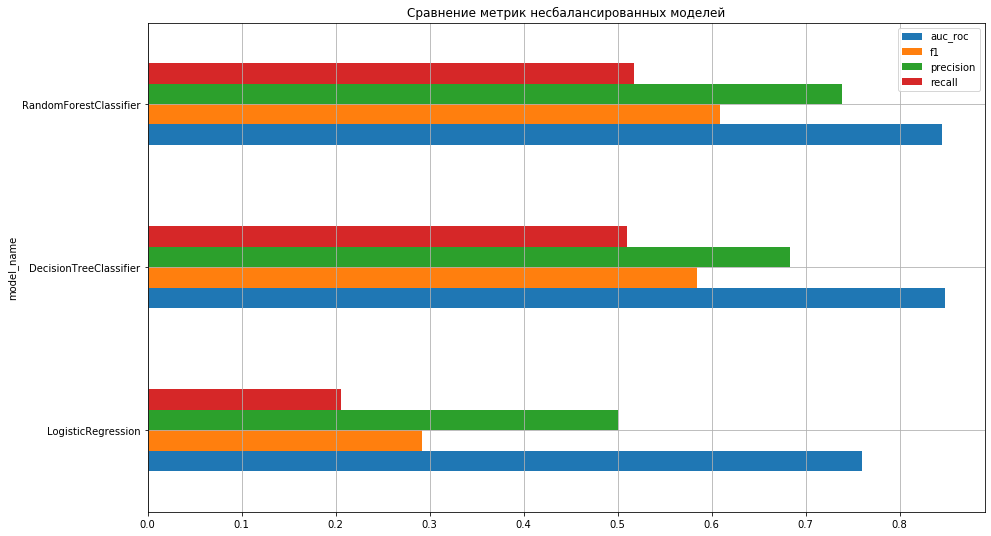

In [ ]:
scores_of_unbalanced_models.plot(x='model_name', kind='barh', figsize=(15,9), grid=True, title='Сравнение метрик несбалансированных моделей')
plt.show()

### Вывод:

Были рассмотрены 3 модели: логистическая регрессия, дерево решений и случайный лес.  
Сильнее всего от дисбаланса страдает модель логистической регресии (F1 = 0.291815).

## Борьба с дисбалансом

Для борьбы с дисбалансом выполним сравнение моделей:

* С взвешиванием классов
* С уменьшением выборки
* С увеличением выборки

### class_weight='balanced'

In [ ]:
scores_of_class_weight_balanced_models = pd.DataFrame(columns=['model_name', 'auc_roc', 'f1', 'precision', 'recall'])

#### LoqisticRegression

In [ ]:
# %%time

# best_c = 0
# best_f1 = 0
# best_max_iter = 0
# best_f1 = 0
# best_logistic_regression_weight_balanced_model = None

# for c in tqdm(np.arange(0.1, 1.1, 0.1)):
#     for max_iter in range(1,101):
#         logistic_regression_model = LogisticRegression(random_state=244466666, C=c, solver='liblinear',
#                                                        max_iter=max_iter, class_weight='balanced')
#         logistic_regression_model.fit(features_train, target_train)
#         predictions_valid = logistic_regression_model.predict(features_valid)
#         f1 = f1_score(target_valid, predictions_valid)
#         if f1 > best_f1:
#             best_max_iter = max_iter
#             best_c = c
#             best_f1 = f1
#             best_logistic_regression_weight_balanced_model = logistic_regression_model

# print(' Лучший C:', best_c, '\n', 'Лучшее количество итераций:', best_max_iter, '\n')

# scores_of_class_weight_balanced_models = scores_of_model(scores_of_class_weight_balanced_models, 'LogisticRegression', best_logistic_regression_weight_balanced_model)

Лучший C: 0.7000000000000001   
 Лучшее количество итераций: 2   
  
best F1: 0.47993  
best AUC-ROC: 0.76146  
CPU times: user 1min 18s, sys: 1min 11s, total: 2min 29s  
Wall time: 2min 29s  

In [ ]:
%%time

logistic_regression_weight_balanced_model = LogisticRegression(random_state=244466666, C=0.7, solver='liblinear',
                                                       max_iter=2, class_weight='balanced')
logistic_regression_weight_balanced_model.fit(features_train, target_train)

         
scores_of_class_weight_balanced_models = scores_of_model(scores_of_class_weight_balanced_models, 'LogisticRegression_weight_balanced', logistic_regression_weight_balanced_model)

best F1: 0.47993
best AUC-ROC: 0.76146
CPU times: user 145 ms, sys: 106 ms, total: 251 ms
Wall time: 190 ms


#### DesisionTreeClassifier

In [ ]:
# %%time

# best_depth = 0
# best_criterion = None
# best_features = 0
# best_f1 = 0
# best_decision_tree_weight_balanced_model = None

# for depth in tqdm(range(1,101)):
#     for crit in ['gini', 'entropy']:
#         for max_features in [None, 'sqrt', 'log2']:
#             decision_tree_model = DecisionTreeClassifier(random_state=244466666, max_depth=depth, 
#                                                          criterion=crit, max_features=max_features, class_weight='balanced')
#             decision_tree_model.fit(features_train, target_train)
#             predictions_valid = decision_tree_model.predict(features_valid)
#             f1 = f1_score(target_valid, predictions_valid)
#             if f1 > best_f1:
#                 best_depth = depth
#                 best_criterion = crit
#                 best_features = max_features
#                 best_f1 = f1
#                 best_decision_tree_weight_balanced_model = decision_tree_model
        
# print(' Лучшая глубина дерева:', best_depth, '\n', 'Лучший критерий:',  best_criterion, '\n',
#       'Признак, по которому ищется лучшее разбиение:', best_features, '\n') 

# scores_of_class_weight_balanced_models = scores_of_model(scores_of_class_weight_balanced_models, 'DecisionTreeClassifier_weight_balanced', best_decision_tree_weight_balanced_model)

Лучшая глубина дерева: 7   
 Лучший критерий: entropy   
 Признак, по которому ищется лучшее разбиение: None   
  
best F1: 0.59086  
best AUC-ROC: 0.84246  
CPU times: user 10.1 s, sys: 16 ms, total: 10.2 s  
Wall time: 10.3 s  

In [ ]:
%%time

decision_tree_weight_balanced_model = DecisionTreeClassifier(random_state=244466666, max_depth=7, criterion='entropy',
                                                             max_features=None, class_weight='balanced')
decision_tree_weight_balanced_model.fit(features_train, target_train)

scores_of_class_weight_balanced_models = scores_of_model(scores_of_class_weight_balanced_models, 'DecisionTreeClassifier_weight_balanced', decision_tree_weight_balanced_model)

best F1: 0.59086
best AUC-ROC: 0.84246
CPU times: user 45.8 ms, sys: 55 µs, total: 45.9 ms
Wall time: 44.6 ms


#### RandomForestClassifier

In [ ]:
# %%time

# best_est = 0
# best_criterion = None
# best_features = 0
# best_depth = 0
# best_f1 = 0
# best_random_forest_weight_balanced_model = None

# for est in tqdm(range(1, 1002, 100)):
#     for crit in ['gini', 'entropy']:
#         for max_features in [None, 'sqrt', 'log2']:
#             for depth in range(1,51):
#                 random_forest_model = RandomForestClassifier(random_state=244466666, n_estimators=est, 
#                                                              criterion=crit, max_features=max_features,
#                                                              max_depth=depth, class_weight='balanced')
#                 random_forest_model.fit(features_train, target_train)
#                 predictions_valid = random_forest_model.predict(features_valid)
#                 f1 = f1_score(target_valid, predictions_valid)
#                 if f1 > best_f1:
#                     best_est = est
#                     best_criterion = crit
#                     best_features = max_features
#                     best_depth = depth
#                     best_f1 = f1
#                     best_random_forest_weight_balanced_model = random_forest_model
                    
# print(' Лучшее кол-во деревьев в лесу:', best_est, '\n', 'Лучший критерий:',  best_criterion, '\n',
#       'Признак, по которому ищется лучшее разбиение:', best_features, '\n',
#       'Лучшая глубина дерева:', best_depth, '\n')

# scores_of_class_weight_balanced_models = scores_of_model(scores_of_class_weight_balanced_models, 'RandomForestClassifier', best_random_forest_weight_balanced_model)

Лучшее кол-во деревьев в лесу: 101   
 Лучший критерий: entropy   
 Признак, по которому ищется лучшее разбиение: sqrt   
 Лучшая глубина дерева: 11   
  
best F1: 0.63144  
best AUC-ROC: 0.86678  
CPU times: user 3h 58min 13s, sys: 21.6 s, total: 3h 58min 35s  
Wall time: 4h 1min 36s  

In [ ]:
%%time

random_forest_weight_balanced_model = RandomForestClassifier(random_state=244466666, n_estimators=101, criterion='entropy',
                                                             max_features='sqrt', max_depth=11, class_weight='balanced') 
random_forest_weight_balanced_model.fit(features_train, target_train)

scores_of_class_weight_balanced_models = scores_of_model(scores_of_class_weight_balanced_models, 'RandomForestClassifier_weight_balanced', random_forest_weight_balanced_model)

best F1: 0.63144
best AUC-ROC: 0.86678
CPU times: user 1.03 s, sys: 0 ns, total: 1.03 s
Wall time: 1.04 s


#### Сравнение метрик после балансировки

In [ ]:
scores_of_class_weight_balanced_models

,model_name,auc_roc,f1,precision,recall
0,LogisticRegression_weight_balanced,0.761462,0.479930,0.367647,0.690955
1,DecisionTreeClassifier_weight_balanced,0.842465,0.590863,0.495741,0.731156
2,RandomForestClassifier_weight_balanced,0.866782,0.631443,0.648148,0.615578


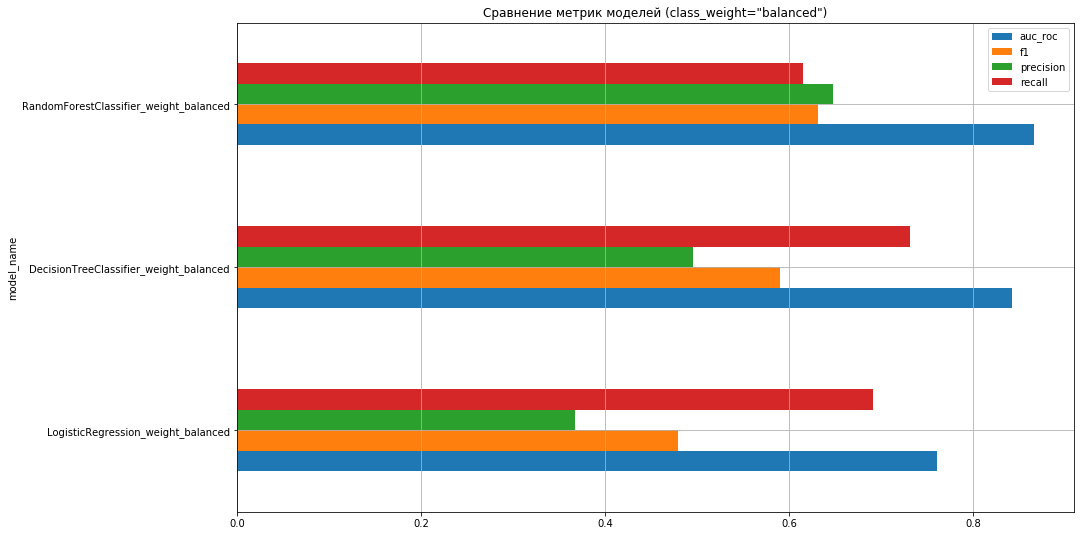

In [ ]:
scores_of_class_weight_balanced_models.plot(x='model_name', kind='barh', figsize=(15,9), grid=True, title='Сравнение метрик моделей (class_weight="balanced")')
plt.show()

#### Вывод:

Модели с параметром class_weight = 'balanced' показали более высокие значения метрик.  
Лучшей моделью является случайный лес.

### upsample

Напишем функцию, которая поможет сделать объекты редкого класса не такими редкими в данных.

In [ ]:
def upsampling(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=244466666)
    
    return features_upsampled, target_upsampled

Посмотрим на дисбаланс классов:

In [ ]:
features_train, target_train = upsampling(features_train, target_train, 4)
target_train.value_counts(normalize=True)

1    0.510542
0    0.489458
Name: exited, dtype: float64

In [ ]:
scores_of_upsampled_models = pd.DataFrame(columns=['model_name', 'auc_roc', 'f1', 'precision', 'recall'])

#### LoqisticRegression

In [ ]:
# %%time

# best_c = 0
# best_f1 = 0
# best_max_iter = 0
# best_logistic_regression_upsampled_model = None

# for c in tqdm(np.arange(0.1, 1.1, 0.1)):
#     for max_iter in range(1,101):
#         logistic_regression_model = LogisticRegression(random_state=244466666, C=c, solver='liblinear', max_iter=max_iter)
#         logistic_regression_model.fit(features_train, target_train) # обучите модель на тренировочной выборке
#         predictions_valid = logistic_regression_model.predict(features_valid)
#         f1 = f1_score(target_valid, predictions_valid)
#         if f1 > best_f1:
#             best_max_iter = max_iter
#             best_c = c
#             best_f1 = f1
#             best_logistic_regression_upsampled_model = logistic_regression_model
            
# print(' Лучший C:', best_c, '\n', 'Лучшее количество итераций:', best_max_iter, '\n') 

# scores_of_upsampled_models = scores_of_model(scores_of_upsampled_models, 'LogisticRegression', best_logistic_regression_upsampled_model)

Лучший C: 0.1   
 Лучшее количество итераций: 2   
 
best F1: 0.47725  
best AUC-ROC: 0.76151  
CPU times: user 1min 35s, sys: 1min 30s, total: 3min 5s  
Wall time: 3min 6s  

In [ ]:
%%time

logistic_regression_upsampled_model = LogisticRegression(random_state=244466666, C=0.1, solver='liblinear', max_iter=2)
logistic_regression_upsampled_model.fit(features_train, target_train)

scores_of_upsampled_models = scores_of_model(scores_of_upsampled_models, 'LogisticRegression_upsampled', logistic_regression_upsampled_model)

best F1: 0.47725
best AUC-ROC: 0.76151
CPU times: user 128 ms, sys: 94.8 ms, total: 222 ms
Wall time: 203 ms


#### DesisionTreeClassifier

In [ ]:
# %%time

# best_depth = 0
# best_criterion = None
# best_features = 0
# best_f1 = 0
# best_decision_tree_upsampled_model = None

# for depth in tqdm(range(1,101)):
#     for crit in ['gini', 'entropy']:
#         for max_features in [None, 'sqrt', 'log2']:
#             decision_tree_model = DecisionTreeClassifier(random_state=244466666, max_depth=depth, 
#                                                          criterion=crit, max_features=max_features)
#             decision_tree_model.fit(features_train, target_train)
#             predictions_valid = decision_tree_model.predict(features_valid)
#             f1 = f1_score(target_valid, predictions_valid)
#             if f1 > best_f1:
#                 best_depth = depth
#                 best_criterion = crit
#                 best_features = max_features
#                 best_f1 = f1
#                 best_decision_tree_upsampled_model = decision_tree_model
        
# print(' Лучшая глубина дерева:', best_depth, '\n', 'Лучший критерий:',  best_criterion, '\n',
#       'Признак, по которому ищется лучшее разбиение:', best_features, '\n') 

# scores_of_upsampled_models = scores_of_model(scores_of_upsampled_models, 'DecisionTree_upsampled', best_decision_tree_upsampled_model)

Лучшая глубина дерева: 8   
 Лучший критерий: entropy   
 Признак, по которому ищется лучшее разбиение: None   

best F1: 0.58471  
best AUC-ROC: 0.82568  
CPU times: user 12.4 s, sys: 71.6 ms, total: 12.5 s  
Wall time: 12.7 s

In [ ]:
%%time

decision_tree_upsampled_model = DecisionTreeClassifier(random_state=244466666, max_depth=8, criterion='entropy', max_features=None)
decision_tree_upsampled_model.fit(features_train, target_train)

scores_of_upsampled_models = scores_of_model(scores_of_upsampled_models, 'DecisionTree_upsampled', decision_tree_upsampled_model)

best F1: 0.58471
best AUC-ROC: 0.82568
CPU times: user 58.8 ms, sys: 90 µs, total: 58.9 ms
Wall time: 57 ms


#### RandomForestClassifier

In [ ]:
# %%time

# best_est = 0
# best_criterion = None
# best_features = 0
# best_depth = 0
# best_f1 = 0
# best_random_forest_upsampled_model = None

# for est in tqdm(range(1, 1002, 100)):
#     for crit in ['gini', 'entropy']:
#         for max_features in [None, 'sqrt', 'log2']:
#             for depth in range(1,51):
#                 random_forest_model = RandomForestClassifier(random_state=244466666, n_estimators=est, criterion=crit,
#                                                              max_features=max_features, max_depth=depth) 
#                 random_forest_model.fit(features_train, target_train)
#                 predictions_valid = random_forest_model.predict(features_valid)
#                 f1 = f1_score(target_valid, predictions_valid)
#                 if f1 > best_f1:
#                     best_est = est
#                     best_criterion = crit
#                     best_features = max_features
#                     best_depth = depth
#                     best_f1 = f1
#                     best_random_forest_upsampled_model = random_forest_model
                    
# print(' Лучшее кол-во деревьев в лесу:', best_est, '\n', 'Лучший критерий:',  best_criterion, '\n',
#       'Признак, по которому ищется лучшее разбиение:', best_features, '\n',
#       'Лучшая глубина дерева:', best_depth, '\n')

# scores_of_upsampled_models = scores_of_model(scores_of_upsampled_models, 'RandomForestClassifier', best_random_forest_upsampled_model)

Лучшее кол-во деревьев в лесу: 201   
 Лучший критерий: entropy   
 Признак, по которому ищется лучшее разбиение: sqrt   
 Лучшая глубина дерева: 12   
   
best F1: 0.62574  
best AUC-ROC: 0.86462  
CPU times: user 5h 54min 12s, sys: 32.5 s, total: 5h 54min 44s  
Wall time: 5h 58min 18s

In [ ]:
%%time

random_forest_upsampled_model = RandomForestClassifier(random_state=244466666, n_estimators=201, criterion='entropy',
                                                             max_features='sqrt', max_depth=12) 
random_forest_upsampled_model.fit(features_train, target_train)

scores_of_upsampled_models = scores_of_model(scores_of_upsampled_models, 'RandomForestClassifier_upsampled', random_forest_upsampled_model)

best F1: 0.62574
best AUC-ROC: 0.86462
CPU times: user 2.96 s, sys: 15.1 ms, total: 2.97 s
Wall time: 2.97 s


#### Сравнение метрик после балансировки

In [ ]:
scores_of_upsampled_models

,model_name,auc_roc,f1,precision,recall
0,LogisticRegression_upsampled,0.761514,0.477253,0.362451,0.698492
1,DecisionTree_upsampled,0.825679,0.584711,0.496491,0.711055
2,RandomForestClassifier_upsampled,0.864616,0.625738,0.590200,0.665829


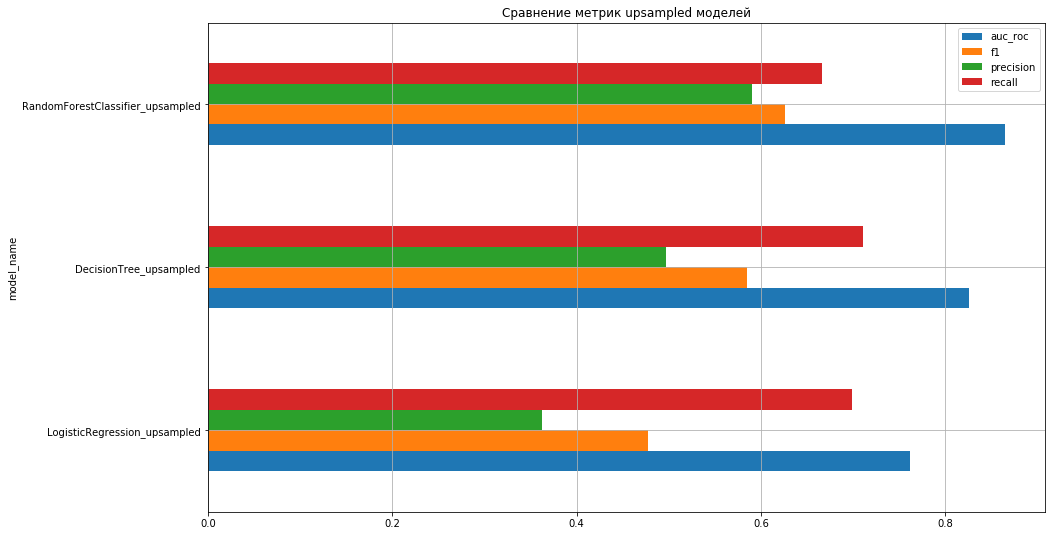

In [ ]:
scores_of_upsampled_models.plot(x='model_name', kind='barh', figsize=(15,9), grid=True, title='Сравнение метрик upsampled моделей')
plt.show()

#### Вывод:

Лучшей моделью остается случайный лес, однако модель с параметром class_weight = 'balanced' показала более высокие значения метрик, чем upsampled модель.

### downsampling

In [ ]:
features_train, features_valid_and_test, target_train, target_valid_and_test = train_test_split(features, target, 
                                                                                                test_size=0.40, random_state=244466666)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_and_test, target_valid_and_test, 
                                                                            test_size=0.5, random_state=244466666)

In [ ]:
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
scaler.fit(features_valid[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Напишем функцию, которая поможет сделать объекты частого класса не такими частыми в данных.

In [ ]:
def downsampling(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=244466666)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=244466666)] + [target_ones])  
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=244466666)
    
    return features_downsampled, target_downsampled

Посмотрим на дисбаланс классов:

In [ ]:
features_train, target_train = downsampling(features_train, target_train, 0.25)
target_train.value_counts(normalize=True)

1    0.51049
0    0.48951
Name: exited, dtype: float64

In [ ]:
scores_of_downsampled_models = pd.DataFrame(columns=['model_name', 'auc_roc', 'f1', 'precision', 'recall'])

#### LoqisticRegression

In [ ]:
# %%time

# best_c = 0
# best_f1 = 0
# best_max_iter = 0
# best_logistic_regression_downsampled_model = None

# for c in tqdm(np.arange(0.1, 1.1, 0.1)):
#     for max_iter in range(1,101):
#         logistic_regression_model = LogisticRegression(random_state=244466666, C=c, solver='liblinear', max_iter=max_iter)
#         logistic_regression_model.fit(features_train, target_train)
#         predictions_valid = logistic_regression_model.predict(features_valid)
#         f1 = f1_score(target_valid, predictions_valid)
#         if f1 > best_f1:
#             best_max_iter = max_iter
#             best_c = c
#             best_f1 = f1
#             best_logistic_regression_downsampled_model = logistic_regression_model

# print(' Лучший C:', best_c, '\n', 'Лучшее количество итераций:', best_max_iter, '\n') 

# scores_of_downsampled_models = scores_of_model(scores_of_downsampled_models, 'LogisticRegression', best_logistic_regression_downsampled_model)

Лучший C: 0.2   
 Лучшее количество итераций: 1   
  
best F1: 0.48  
best AUC-ROC: 0.7601  
CPU times: user 50 s, sys: 42.7 s, total: 1min 32s  
Wall time: 1min 33s

In [ ]:
%%time

logistic_regression_downsampled_model = LogisticRegression(random_state=244466666, C=0.2, solver='liblinear', max_iter=1)
logistic_regression_downsampled_model.fit(features_train, target_train)

scores_of_downsampled_models = scores_of_model(scores_of_downsampled_models, 'LogisticRegression_downsampled', logistic_regression_downsampled_model)

best F1: 0.48
best AUC-ROC: 0.7601
CPU times: user 83.4 ms, sys: 93.8 ms, total: 177 ms
Wall time: 181 ms


#### DesisionTreeClassifier

In [ ]:
# %%time

# best_depth = 0
# best_criterion = None
# best_features = 0
# best_f1 = 0
# best_decision_tree_downsampled_model = None

# for depth in tqdm(range(1,101)):
#     for crit in ['gini', 'entropy']:
#         for max_features in [None, 'sqrt', 'log2']:
#             decision_tree_model = DecisionTreeClassifier(random_state=244466666, max_depth=depth, 
#                                                          criterion=crit, max_features=max_features)
#             decision_tree_model.fit(features_train, target_train)
#             predictions_valid = decision_tree_model.predict(features_valid)
#             f1 = f1_score(target_valid, predictions_valid)
#             if f1 > best_f1:
#                 best_depth = depth
#                 best_criterion = crit
#                 best_features = max_features
#                 best_f1 = f1
#                 best_decision_tree_downsampled_model = decision_tree_model
        
# print(' Лучшая глубина дерева:', best_depth, '\n', 'Лучший критерий:',  best_criterion, '\n',
#       'Признак, по которому ищется лучшее разбиение:', best_features, '\n') 

# scores_of_downsampled_models = scores_of_model(scores_of_downsampled_models, 'DecisionTree', best_decision_tree_downsampled_model)

Лучшая глубина дерева: 5   
 Лучший критерий: entropy   
 Признак, по которому ищется лучшее разбиение: None   

best F1: 0.56991  
best AUC-ROC: 0.84461  
CPU times: user 4.9 s, sys: 36.1 ms, total: 4.93 s  
Wall time: 5.02 s

In [ ]:
%%time

decision_tree_downsampled_model = DecisionTreeClassifier(random_state=244466666, max_depth=5, criterion='entropy', max_features=None)
decision_tree_downsampled_model.fit(features_train, target_train)

scores_of_downsampled_models = scores_of_model(scores_of_downsampled_models, 'DecisionTree_downsampled', decision_tree_downsampled_model)

best F1: 0.56991
best AUC-ROC: 0.84461
CPU times: user 25.8 ms, sys: 67 µs, total: 25.9 ms
Wall time: 24.6 ms


#### RandomForestClassifier

In [ ]:
# %%time

# best_est = 0
# best_criterion = None
# best_features = 0
# best_depth = 0
# best_f1 = 0
# best_random_forest_downsampled_model = None

# for est in tqdm(range(1, 1002, 100)):
#     for crit in ['gini', 'entropy']:
#         for max_features in [None, 'sqrt', 'log2']:
#             for depth in range(1,51):
#                 random_forest_model = RandomForestClassifier(random_state=244466666, n_estimators=est, criterion=crit,
#                                                              max_features=max_features, max_depth=depth) 
#                 random_forest_model.fit(features_train, target_train)
#                 predictions_valid = random_forest_model.predict(features_valid)
#                 f1 = f1_score(target_valid, predictions_valid)
#                 if f1 > best_f1:
#                     best_est = est
#                     best_criterion = crit
#                     best_features = max_features
#                     best_depth = depth
#                     best_f1 = f1
#                     best_random_forest_downsampled_model = random_forest_model
                    
# print(' Лучшее кол-во деревьев в лесу:', best_est, '\n', 'Лучший критерий:',  best_criterion, '\n',
#       'Признак, по которому ищется лучшее разбиение:', best_features, '\n',
#       'Лучшая глубина дерева:', best_depth, '\n')

# scores_of_downsampled_models = scores_of_model(scores_of_downsampled_models, 'RandomForestClassifier', best_random_forest_downsampled_model)

Лучшее кол-во деревьев в лесу: 101   
 Лучший критерий: gini   
 Признак, по которому ищется лучшее разбиение: sqrt   
 Лучшая глубина дерева: 10   
 
best F1: 0.59632  
best AUC-ROC: 0.85688  
CPU times: user 1h 54min 55s, sys: 20 s, total: 1h 55min 15s  
Wall time: 1h 56min

In [ ]:
%%time

random_forest_downsampled_model = RandomForestClassifier(random_state=244466666, n_estimators=101, criterion='gini',
                                                             max_features='sqrt', max_depth=10) 
random_forest_downsampled_model.fit(features_train, target_train)

scores_of_downsampled_models = scores_of_model(scores_of_downsampled_models, 'RandomForestClassifier_downsampled', random_forest_downsampled_model)

best F1: 0.59632
best AUC-ROC: 0.85688
CPU times: user 582 ms, sys: 3.87 ms, total: 586 ms
Wall time: 604 ms


#### Сравнение метрик после балансировки

In [ ]:
scores_of_downsampled_models

,model_name,auc_roc,f1,precision,recall
0,LogisticRegression_downsampled,0.760097,0.480000,0.367021,0.693467
1,DecisionTree_downsampled,0.844605,0.569912,0.439891,0.809045
2,RandomForestClassifier_downsampled,0.856881,0.596321,0.485039,0.773869


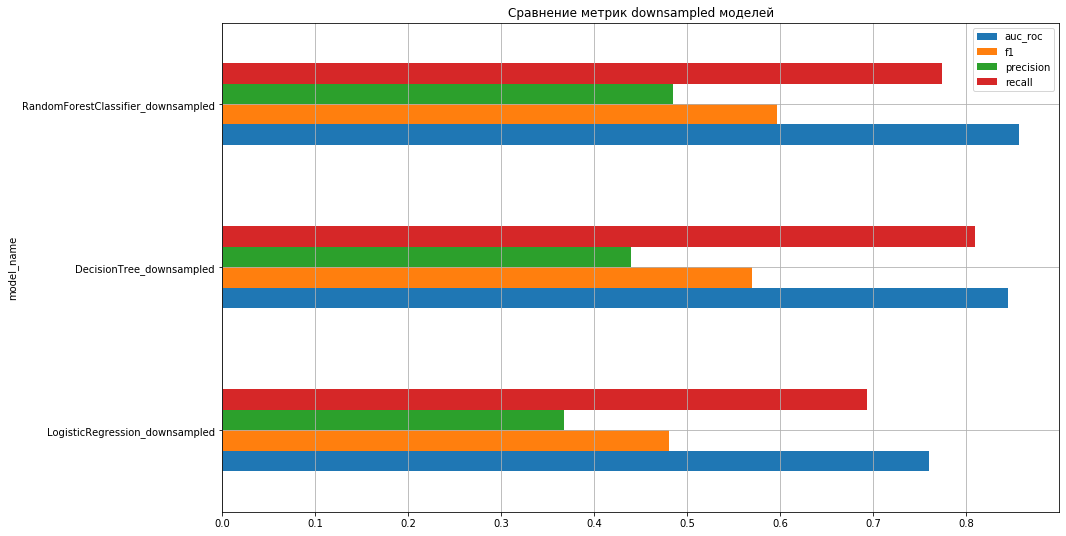

In [ ]:
scores_of_downsampled_models.plot(x='model_name', kind='barh', figsize=(15,9), grid=True, title='Сравнение метрик downsampled моделей')
plt.show()

#### Вывод:

Значения метрик случайного леса хуже, чем у upsampled модели.

### Вывод:

Эффективнее всего избавиться от дисбаланса классов поможет параметр class_weight = 'balanced'.

## Тестирование модели

Сравнивать будем только лучшие модели разных балансировок - случайный лес

In [ ]:
def ROC_curve_and_metrics(model, name):
    print('Модель:', name)
    predicted_test = model.predict(features_test)
    recall = recall_score(target_test, predicted_test)
    precision = precision_score(target_test, predicted_test)
    f1 = f1_score(target_test, predicted_test)
    probabilities = model.predict_proba(features_test)
    probabilities_one = probabilities[:,1]
    auc_roc = roc_auc_score(target_test, probabilities_one)
    print('best recall:', round(recall, 5))
    print('best precision:', round(precision, 5))
    print('best F1:', round(f1, 5))
    print('best AUC-ROC:', round(auc_roc, 5))
    print()
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
    plt.plot(fpr, tpr, label=name)

Модель: disbalansed RandomForestClassifier
best recall: 0.50251
best precision: 0.65147
best F1: 0.56738
best AUC-ROC: 0.83904

Модель: class weight balanced RandomForestClassifier
best recall: 0.61307
best precision: 0.59951
best F1: 0.60621
best AUC-ROC: 0.84589

Модель: upsample balanced RandomForestClassifier
best recall: 0.64824
best precision: 0.56332
best F1: 0.6028
best AUC-ROC: 0.84508

Модель: downsample balanced RandomForestClassifier
best recall: 0.73618
best precision: 0.45568
best F1: 0.56292
best AUC-ROC: 0.83854



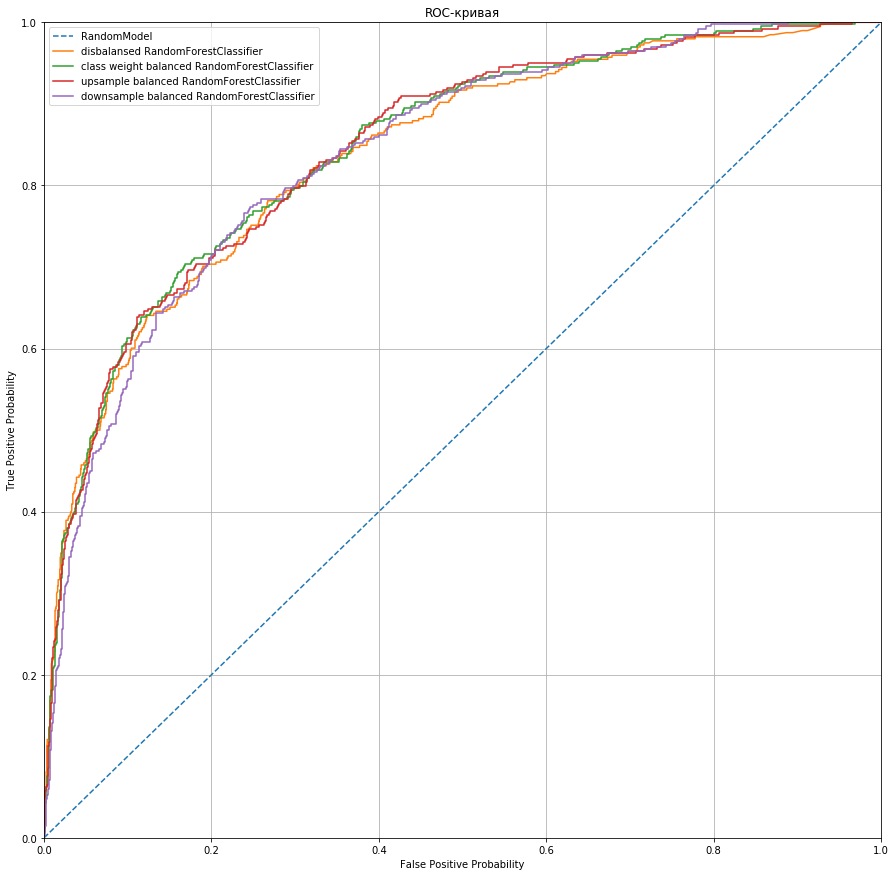

In [ ]:
plt.figure(figsize=(15, 15))
plt.xlabel('False Positive Probability')
plt.ylabel('True Positive Probability')
plt.title('ROC-кривая')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.grid()

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
ROC_curve_and_metrics(random_forest_model, 'disbalansed RandomForestClassifier')
ROC_curve_and_metrics(random_forest_weight_balanced_model, 'class weight balanced RandomForestClassifier')
ROC_curve_and_metrics(random_forest_upsampled_model, 'upsample balanced RandomForestClassifier')
ROC_curve_and_metrics(random_forest_downsampled_model, 'downsample balanced RandomForestClassifier')

plt.legend()
plt.show()

На тестовой выборке class weight balanced модель так же показала лучшие результаты метрик следи всех моделей.  
Для данной задачи это наилучшая модель.

## Бонус (обучение лучшей модели на выборке train + valid) и важность факторов

### Обучение модели на выборке train + valid

In [ ]:
features_train_and_valid, features_test, target_train_and_valid, target_test = train_test_split(features, target, 
                                                                                                test_size=0.20, random_state=244466666)

In [ ]:
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(features_train_and_valid[numeric])
features_train_and_valid[numeric] = scaler.transform(features_train_and_valid[numeric])
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [ ]:
%%time

random_forest_bonus_model = RandomForestClassifier(random_state=244466666, n_estimators=101, criterion='entropy',
                                                             max_features='sqrt', max_depth=11, class_weight='balanced') 
random_forest_bonus_model.fit(features_train_and_valid, target_train_and_valid)

CPU times: user 1.26 s, sys: 0 ns, total: 1.26 s
Wall time: 1.28 s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=101, n_jobs=None, oob_score=False,
                       random_state=244466666, verbose=0, warm_start=False)

Модель: bonus RandomForestClassifier
best recall: 0.59753
best precision: 0.605
best F1: 0.60124
best AUC-ROC: 0.85331



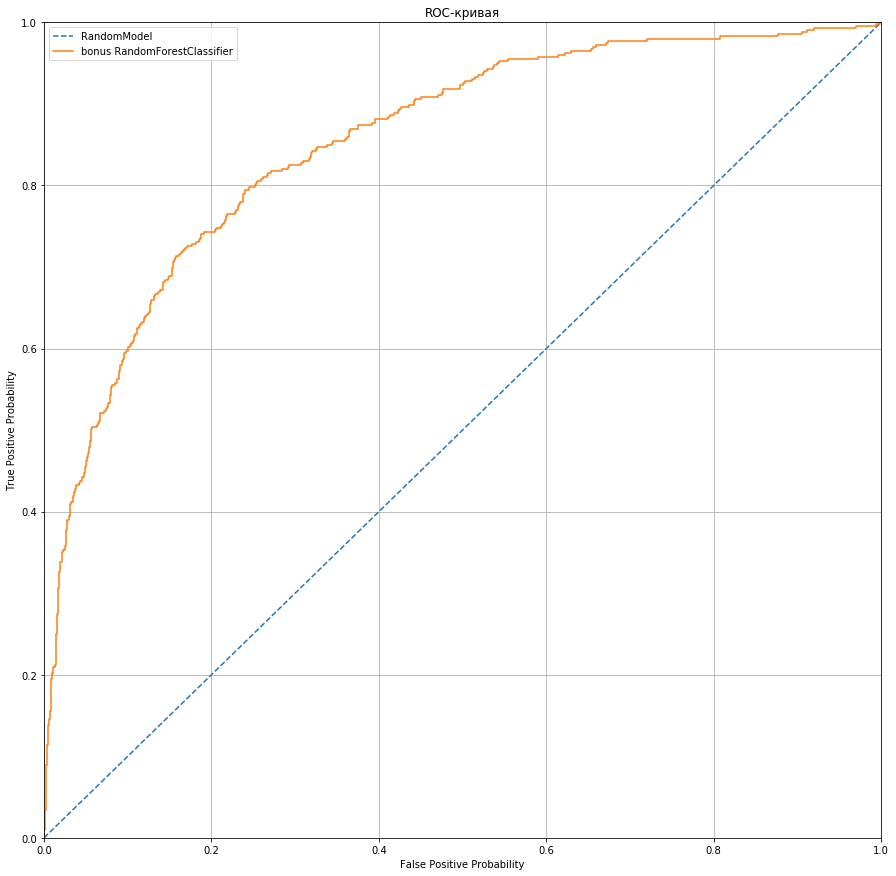

In [ ]:
plt.figure(figsize=(15, 15))
plt.xlabel('False Positive Probability')
plt.ylabel('True Positive Probability')
plt.title('ROC-кривая')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.grid()

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
ROC_curve_and_metrics(random_forest_bonus_model, 'bonus RandomForestClassifier')

plt.legend()
plt.show()

К сожалению, обучение модели на обобщенной выборке train+valid не прибавило значений метрик.

### Исследование важности факторов

In [ ]:
importances = random_forest_weight_balanced_model.feature_importances_  
feature_list = list(features_train.columns) 
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results

,feature,importance
0,age,0.292539
1,num_of_products,0.156360
2,balance,0.131744
3,estimated_salary,0.112099
4,credit_score,0.108950
5,tenure,0.062393
6,is_active_member,0.047477
7,geography_Germany,0.038789
8,gender_Male,0.021643
9,has_cr_card,0.014841


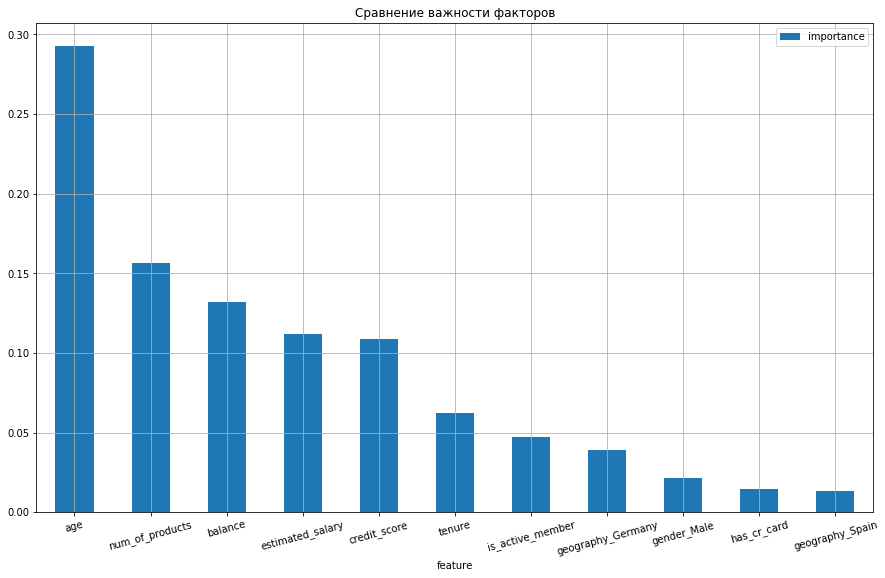

In [ ]:
feature_results.plot(x='feature', y='importance', kind='bar', figsize=(15,9), grid=True, title='Сравнение важности факторов')
plt.xticks(rotation=15)
plt.show()